In [2]:
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install keras==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 94.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 11.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/

# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# DATASET
#DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [7]:
df = pd.read_csv("/content/drive/MyDrive/DATASET.csv", encoding =DATASET_ENCODING)

In [8]:
df.target.unique()

array([0, 4, 1])

In [9]:
print("Dataset size:", len(df))

Dataset size: 1048575


In [10]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1048570,4,1555847385,Sat Apr 18 20:52:04 PDT 2009,NO_QUERY,livelaughenjoy,@STEF_EcHeLoN_ love that movie it is funny but...
1048571,4,1555847388,Sat Apr 18 20:52:03 PDT 2009,NO_QUERY,UniSoftFemme,Sweet childhood dreams Dreams that make it h...
1048572,4,1555847402,Sat Apr 18 20:52:04 PDT 2009,NO_QUERY,Shaynanigans,Just saw Paris Hilton... Lol
1048573,4,1555847432,Sat Apr 18 20:52:03 PDT 2009,NO_QUERY,zipamna,i am very happy today! and i don't why?


In [11]:
decode_map = {0: "NEGATIVE", 1: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    print(label)
    return decode_map[label]

In [12]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

Text(0.5, 1.0, 'Dataset labels distribuition')

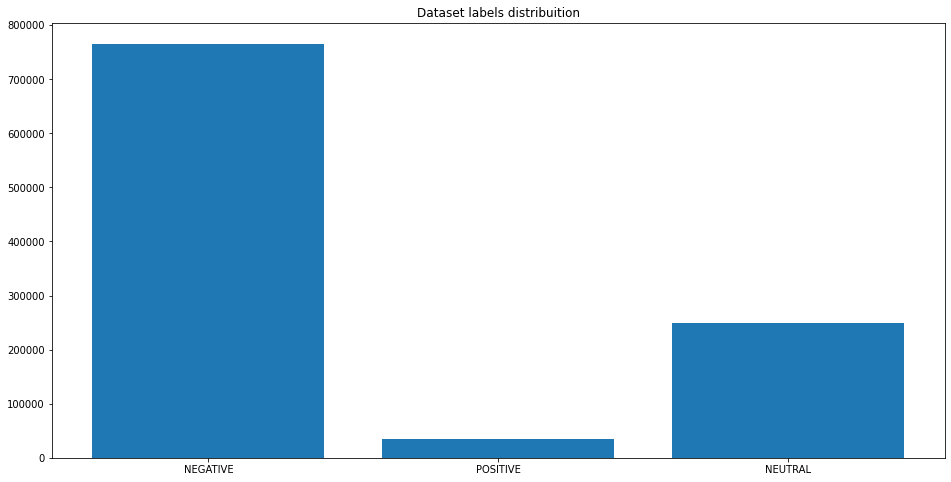

In [13]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [14]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [15]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [16]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 3min 22s, sys: 19.3 s, total: 3min 41s
Wall time: 3min 17s


In [17]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 838860
TEST size: 209715


In [18]:
%%time
documents = [_text.split() for _text in df_train.text] 

CPU times: user 6.36 s, sys: 706 ms, total: 7.07 s
Wall time: 6.47 s


In [19]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


2022-06-12 09:00:53,027 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2022-06-12T09:00:53.027591', 'gensim': '4.2.0', 'python': '3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [20]:
w2v_model.build_vocab(documents)

2022-06-12 09:00:53,297 : INFO : collecting all words and their counts
2022-06-12 09:00:53,301 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-06-12 09:00:53,363 : INFO : PROGRESS: at sentence #10000, processed 72747 words, keeping 13639 word types
2022-06-12 09:00:53,452 : INFO : PROGRESS: at sentence #20000, processed 145616 words, keeping 20960 word types
2022-06-12 09:00:53,540 : INFO : PROGRESS: at sentence #30000, processed 218020 words, keeping 26823 word types
2022-06-12 09:00:53,642 : INFO : PROGRESS: at sentence #40000, processed 291181 words, keeping 31875 word types
2022-06-12 09:00:53,731 : INFO : PROGRESS: at sentence #50000, processed 364151 words, keeping 36460 word types
2022-06-12 09:00:53,861 : INFO : PROGRESS: at sentence #60000, processed 436541 words, keeping 40758 word types
2022-06-12 09:00:53,948 : INFO : PROGRESS: at sentence #70000, processed 509287 words, keeping 44724 word types
2022-06-12 09:00:54,100 : INFO : PROGRESS: at s

In [21]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 23477


In [22]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2022-06-12 09:01:06,353 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 23477 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2022-06-12T09:01:06.353620', 'gensim': '4.2.0', 'python': '3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'train'}
2022-06-12 09:01:07,559 : INFO : EPOCH 0 - PROGRESS: at 7.37% examples, 394072 words/s, in_qsize 15, out_qsize 0
2022-06-12 09:01:08,612 : INFO : EPOCH 0 - PROGRESS: at 14.58% examples, 381491 words/s, in_qsize 15, out_qsize 0
2022-06-12 09:01:09,677 : INFO : EPOCH 0 - PROGRESS: at 22.08% examples, 381637 words/s, in_qsize 12, out_qsize 3
2022-06-12 09:01:10,747 : INFO : EPOCH 0 - PROGRESS: at 30.64% examples, 393886 words/s, in_qsize 16, out_qsize 0
2022-06-12 09:01:11,799 : INFO : EPOCH 0 - PROGRESS: at 38.17% examples, 392444 words/s, in_qsize 15, out_qsize 1
2022-06-12 09:01:

CPU times: user 13min 30s, sys: 6.85 s, total: 13min 37s
Wall time: 7min 16s


(172623912, 195277184)

In [23]:
w2v_model.wv.most_similar("love")

[('luv', 0.5519117116928101),
 ('loves', 0.5312918424606323),
 ('loved', 0.4894481301307678),
 ('looove', 0.45488014817237854),
 ('miss', 0.4482479691505432),
 ('adore', 0.4387578070163727),
 ('amazing', 0.4284117519855499),
 ('awesome', 0.40271344780921936),
 ('loving', 0.3877430558204651),
 ('lov', 0.37412723898887634)]

In [24]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 207005
CPU times: user 36.4 s, sys: 2.93 s, total: 39.3 s
Wall time: 35.6 s


In [25]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 14.1 s, sys: 359 ms, total: 14.5 s
Wall time: 14.5 s


In [26]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL']

In [27]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (838860, 1)
y_test (209715, 1)


In [28]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (838860, 300)
y_train (838860, 1)

x_test (209715, 300)
y_test (209715, 1)


In [29]:
y_train[:10]

array([[0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0]])

In [30]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(207005, 300)


In [31]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [32]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

2022-06-12 09:09:18,888 : WARNING : Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          62101500  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 62,262,001
Trainable params: 160,501
Non-trainable params: 62,101,500
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [34]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [35]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
738/738 [==============================] - 857s 1s/step - loss: 0.4431 - accuracy: 0.7752 - val_loss: 0.3946 - val_accuracy: 0.7912


2022-06-12 09:23:36,678 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 2/8
738/738 [==============================] - 840s 1s/step - loss: 0.4089 - accuracy: 0.7873 - val_loss: 0.3761 - val_accuracy: 0.7973


2022-06-12 09:37:36,947 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 3/8
738/738 [==============================] - 821s 1s/step - loss: 0.3966 - accuracy: 0.7909 - val_loss: 0.3679 - val_accuracy: 0.7955


2022-06-12 09:51:17,675 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 4/8
738/738 [==============================] - 850s 1s/step - loss: 0.3904 - accuracy: 0.7917 - val_loss: 0.3628 - val_accuracy: 0.7995


2022-06-12 10:05:27,589 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 5/8
738/738 [==============================] - 851s 1s/step - loss: 0.3827 - accuracy: 0.7929 - val_loss: 0.3546 - val_accuracy: 0.8019


2022-06-12 10:19:38,501 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 6/8
738/738 [==============================] - 845s 1s/step - loss: 0.3773 - accuracy: 0.7932 - val_loss: 0.3495 - val_accuracy: 0.7986


2022-06-12 10:33:43,943 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 7/8
738/738 [==============================] - 855s 1s/step - loss: 0.3703 - accuracy: 0.7932 - val_loss: 0.3415 - val_accuracy: 0.8024


2022-06-12 10:47:58,568 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


Epoch 8/8
738/738 [==============================] - 836s 1s/step - loss: 0.3617 - accuracy: 0.7929 - val_loss: 0.3310 - val_accuracy: 0.7988


2022-06-12 11:01:55,071 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


CPU times: user 2h 41min 52s, sys: 22min 10s, total: 3h 4min 2s
Wall time: 1h 52min 35s


In [36]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

205/205 [==============================] - 22s 106ms/step - loss: 0.3280 - accuracy: 0.8021

ACCURACY: 0.8020933270454407
LOSS: 0.32804572582244873
CPU times: user 19 s, sys: 1.32 s, total: 20.3 s
Wall time: 21.7 s


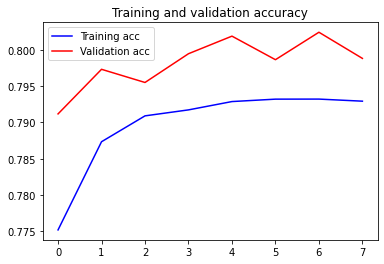

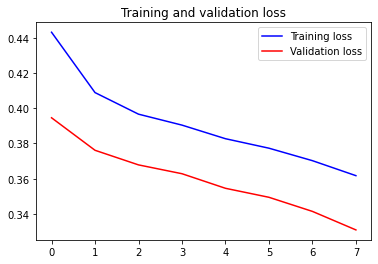

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [38]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [39]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [40]:
predict("I love the music")

{'elapsed_time': 0.32645583152770996,
 'label': 'POSITIVE',
 'score': 0.9992914199829102}

In [41]:
predict("I hate the rain")

{'elapsed_time': 0.10534143447875977,
 'label': 'NEGATIVE',
 'score': 0.007124869152903557}

In [42]:
predict("i don't know what i'm doing")

{'elapsed_time': 0.10362505912780762,
 'label': 'NEGATIVE',
 'score': 0.22248463332653046}

In [43]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

27/27 [==============================] - 15s 532ms/step
CPU times: user 8.96 s, sys: 6.13 s, total: 15.1 s
Wall time: 21 s


In [44]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

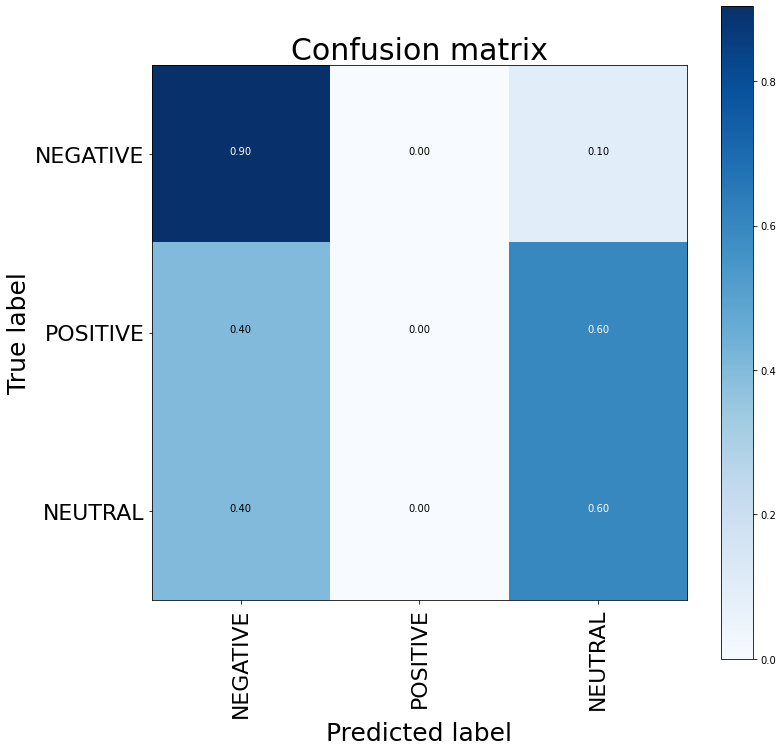

CPU times: user 748 ms, sys: 2.07 ms, total: 750 ms
Wall time: 746 ms


In [45]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()


In [46]:
print(classification_report(y_test_1d, y_pred_1d))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    NEGATIVE       0.86      0.90      0.88    153223
     NEUTRAL       0.00      0.00      0.00     49691
    POSITIVE       0.08      0.60      0.15      6801

    accuracy                           0.68    209715
   macro avg       0.31      0.50      0.34    209715
weighted avg       0.63      0.68      0.65    209715



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
accuracy_score(y_test_1d, y_pred_1d)

0.6796843335002265

In [48]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

2022-06-12 11:02:42,859 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-06-12T11:02:42.859162', 'gensim': '4.2.0', 'python': '3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'saving'}
2022-06-12 11:02:42,860 : INFO : not storing attribute cum_table
2022-06-12 11:02:43,187 : INFO : saved model.w2v
